# Daten Importieren

In [1]:
import pandas as pd

In [2]:
# Datensatz der VW-Aktienkurshistorie über Pandas laden
dataset = pd.read_csv("VOW3.DE_max.csv")

In [3]:
# Die neusten 90 Einträge des Datensatzes übernehmen (optional)
#dataset = dataset.tail(90)

# Polynomiale Regressionsanalyse

## Imports

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets, linear_model, model_selection
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np

## Datenaufbreitung (Daten konvertieren und in numpy-Arrays laden)

In [5]:
# Deklaration der zu befüllenden Arrays
stocks_X = []
stocks_Y = []

# Datenaufbereitung
for index, row in dataset.iterrows():
    # Konvertierung des Datums in passendes Format
    element = datetime.datetime.strptime(row['Date'],"%Y-%m-%d")
    timestamp = datetime.datetime.timestamp(element)
    #Abspeichern des kovertierten Datums und dem Preis in neuen Arrays
    stocks_X.append([timestamp]) 
    stocks_Y.append([row['Close']])

# Abspeichern der Daten in einem numpy-Array
stocks_X = np.array(stocks_X)
stocks_Y = np.array(stocks_Y)

# Letzte 30 Einträge zum Testen in separates Array
stocks_X_test = stocks_X[-1161:]
stocks_Y_test = stocks_Y[-1161:]

# Restliche Einträge zum Trainieren in separates Array
stocks_X_train = stocks_X[:-1161]
stocks_Y_train = stocks_Y[:-1161]

## Regression

In [6]:
# Setzen der Polynomial-Features
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Vorbereiten der Polynomialen Regression
regr = linear_model.LinearRegression()
pipeline = Pipeline([("polynomial_features", poly_features),
                     ("linear_regression", regr)])
pipeline.fit(stocks_X_train, stocks_Y_train)

# Ausführen der Polynomialen Regression
stocks_Y_pred = pipeline.predict(stocks_X_test)
stocks_Y_pred_train = pipeline.predict(stocks_X_train)

## Plot

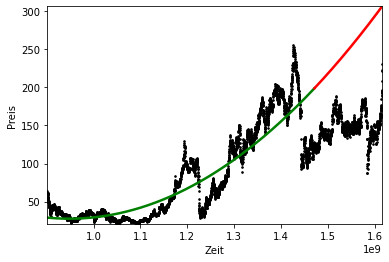

In [14]:
%matplotlib inline

# Plotten der Datenpunkte
plt.scatter(stocks_X, stocks_Y, 2.5, color='black', alpha=1)

# Plotten der Regressionsgerade der Trainingsdaten in grün
plt.plot(stocks_X_train, stocks_Y_pred_train, color='green', linewidth=2.5)

# Plotten der Vorhersage in rot
plt.plot(stocks_X_test, stocks_Y_pred, color='red', linewidth=2.5)
    
# Wertebereich anpassen
plt.xlim(min(stocks_X),max(stocks_X))
plt.ylim(min(stocks_Y),max(stocks_Y)*1.2)

# Achsenbeschriftung
plt.ylabel("Preis")
plt.xlabel("Zeit")

# Ausgabe des Plots
plt.show()

## Evaluation

### Mittlerer absoluter Fehler

In [8]:
print("Mean squared error: %.3f" % (mean_squared_error(stocks_Y_train, stocks_Y_pred_train)))

Mean squared error: 730.269


### Mittlere quatratische Abweichung

In [9]:
print("Mean absolute error: %.3f" % (mean_absolute_error(stocks_Y_train, stocks_Y_pred_train)))

Mean absolute error: 19.820


### Bestimmtheitsmaß

In [10]:
print("R^2: %.3f" % (r2_score(stocks_Y_train, stocks_Y_pred_train)))

R^2: 0.782


### Fazit

Das Fazit bei einer Polynomialen Regression ähnelt sehr stark den Ergebnissen der Linearen Regression. Sie führt ebenfalls nur Vergangenheitswerte fort und ist daher kein zuverlässiges Indiz für die zukünftige Entwicklung des Aktienkurses, kann allerdings trotzdem die Tendenz der bisherigen Kursentwicklung darstellen. Wenn die In diesem Fall, bei den selben verwendeten Datensätzen wie bei der linearen Regression, liegen die Vorhersagen noch weiter über den tatsächlich eingetretenen Werten.

# Vergleich verschiedener Ansätze

|     | Lineare Regression | Polynomiale Regression | Zeitreihenanalyse (Tagesabhängig) | Zeitreihenanalyse (Monatsabhängig) |
|:---|:---:|:---:|:---:|:---:|
| **MSE** | 959,436            | 730,269                | 8,765                             | 120,847                            |
| **MAE** | 25,832             | 19,820                 | 2,041                             | 8,102                              |
| **R2**  | 0,714              | 0,782                  | 0,972                             | 0,579                              |